<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Random%20Forest/RandomForest_Regressor_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Algorithms/master/Dataset/diabetes.csv'

dados = pd.read_csv( url )
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dados.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
X = dados.drop( 'Age', axis=1 )
y = dados['Age']

In [6]:
X_train, X_teste, y_train, y_teste = train_test_split( X, y, test_size = 0.30, random_state = 1)

In [7]:
modelo = RandomForestRegressor( n_estimators=300, n_jobs=-1, min_samples_leaf=1 )

In [9]:
modelo.fit( X_train, y_train );

In [11]:
y_pred = modelo.predict( X_teste )

mse = mean_squared_error( y_teste, y_pred )
print(f'Mean Squared Error = {mse:,.2f}%')

Mean Squared Error = 75.64%


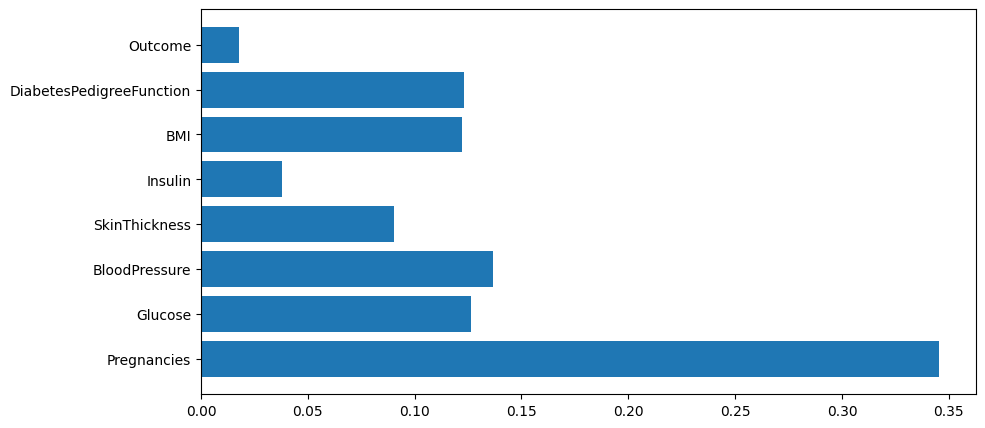

In [43]:
model_ranks = pd.Series( modelo.feature_importances_, index=X_train.columns, name="Importance" ).sort_index

import matplotlib.pyplot as plt

plt.figure( figsize=(10,5) )

plt.barh( X_train.columns, modelo.feature_importances_ )
plt.show()
